In [1]:
import numpy as np
import pandas as pd
import os
import sqlalchemy as sqla
import sqlite3 as sql
from sqlite3 import Error
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
file_loc = os.getcwd()

In [3]:
file_loc

'C:\\Users\\KH7020823\\sta208\\STA-208-project'

In [4]:
db1= sql.connect(file_loc+"\data1.db")
df1=pd.read_sql("SELECT * FROM loan",db1)
db2= sql.connect(file_loc+"\data2.db")
df2=pd.read_sql("SELECT * FROM loan",db2)
db3= sql.connect(file_loc+"\data3.db")
df3=pd.read_sql("SELECT * FROM loan",db3)
db4= sql.connect(file_loc+"\data4.db")
df4=pd.read_sql("SELECT * FROM loan",db4)
db5= sql.connect(file_loc+"\data5.db")
df5=pd.read_sql("SELECT * FROM loan",db5)
db6= sql.connect(file_loc+"\data6.db")
df6=pd.read_sql("SELECT * FROM loan",db6)
db7= sql.connect(file_loc+"\data7.db")
df7=pd.read_sql("SELECT * FROM loan",db7)
db8= sql.connect(file_loc+"\data8.db")
df8=pd.read_sql("SELECT * FROM loan",db8)
db9= sql.connect(file_loc+"\data9.db")
df9=pd.read_sql("SELECT * FROM loan",db9)
db10= sql.connect(file_loc+"\data10.db")
df10=pd.read_sql("SELECT * FROM loan",db10)
db11= sql.connect(file_loc+"\data11.db")
df11=pd.read_sql("SELECT * FROM loan",db11)
db12= sql.connect(file_loc+"\data12.db")
df12=pd.read_sql("SELECT * FROM loan",db12)

In [5]:
df = pd.DataFrame()
df = df.append(df1)
df = df.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df = df.append(df7)
df = df.append(df8)
df = df.append(df9)
df = df.append(df10)
df = df.append(df11)
df = df.append(df12)
df.shape

(434407, 65)

In [6]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,17600,17600,17600,36 months,10.75%,574.12,B,B4,RENT,57109,...,6,0,1,95.1,1,0,88629,83563,2300,80329
1,12500,12500,12500,60 months,8.39%,255.8,B,B1,RENT,120000,...,9,0,1,100,0,0,80899,40673,48400,32499
2,10000,10000,10000,36 months,11.99%,332.1,C,C1,MORTGAGE,75000,...,9,0,2,100,0,1,71858,48844,0,60358
3,3000,3000,3000,36 months,7.39%,93.17,A,A4,RENT,80000,...,6,0,0,95,0,0,221908,25665,42200,30936
4,2000,2000,2000,36 months,6.49%,61.29,A,A2,RENT,90000,...,19,0,2,97.3,0,0,176338,68841,122100,48438


Notice that the grade and subgrade variables are assessed directly from the interest rate, that is, the variable int_rate. Thus, mere int_rate suffices to cover the information provided by them, and grade and subgrade can be removed from our list of variables. Also zip_code is not appropriate to be deemed as a variable and issue_d doesn't contain valuable information, we also drop both of them.

#### Dummy variables

Among the 59 variables we have now, some of them are quantitative and have only a few statuses. For these variables, we can establish dummy variables that take either 0 or 1. For quantitative variables that have more than two categories, we combine some of to create more synthesized categories.

For the resonse variable loan_status, because it has 7 different categories, Fully paid, Current, In Grace Period, Late(16-30 days), Late(31-120 days), Default, Charged Off, we want to categorize them into two groups that result to a binary variable. Since the first two categories are signs of a good status of loan, and the latter five indicate different extents of late payment, we denote good status as Fully paid or Current, and bad status as In Grace Period, Late(16-30 days), Late(31-120 days), Default or Charged Off.

loan_status$=
\left\{\begin{array}{cl} 
		1,& \text{good status}\\
		0,& \text{bad status}
	\end{array}\right.$

And among the predictor varibles, purpose also has multiple categories: car, home-improvement, house, moving, major_purchase, renewable_enery, credit_card, debt_consolidation, small_business, medical, vacation and other, which requires many dummy variables. To make the situation simpler, except for medical, we classify car, home_improvement, house, moving, major_purchase and renewable_enery as property, credit_card, debt_consolidation and small_business as financial, vacation and other as others. Therefore, we get 4 categories of purposes, which can be represented by 3 dummy variables:

purpose1$=
\left\{\begin{array}{cl} 
		1,& \text{property}\\
		0,& \text{others} 
	\end{array}\right.$, 
purpose2$= 
\left\{\begin{array}{cl} 
		1,&\text{financial} \\
		0,&\text{others} 
	\end{array}\right.$, 
purpose3$=
\left\{\begin{array}{cl} 
		1,&\text{medical} \\
		0,&\text{others}  
	\end{array}\right.$

Also note that addr_state records the state address of the borrower. Considering the data is collected from Lending Club, which locates in San Francisco, CA, we want to know whether it makes a difference if the loan request is from an instate borrower or not. In this case, we only have to make a distinction between a California loaner and a non California borrower.

addr_state$=
\left\{\begin{array}{cl} 
		1,&\text{California} \\
		0,&\text{other states}  
	\end{array}\right.$

Similarly, in verification_status, we combine verified and source verified as verified:

verification_status$=
\left\{\begin{array}{cl} 
		1,& \text{verified}\\
		0, & \text{not verified}
	\end{array}\right.$
 
There are 4 more qualitative variables, which are coded as below:

term$=
\left\{\begin{array}{cl} 
		1,&\text{36 months} \\
		0,&\text{60 others}  
	\end{array}\right.$
 
home_ownership1$=
\left\{\begin{array}{cl} 
		1,& \text{rent}\\
		0,& \text{any}  
	\end{array}\right.$, 
home_ownership2$=
\left\{\begin{array}{cl} 
		1,& \text{own}\\
		0,& \text{any}
	\end{array}\right.$, 
home_ownership3$=
\left\{\begin{array}{cl} 
		1,& \text{mortage}\\
		0,& \text{any} 
	\end{array}\right.$

initial_list_status$=
\left\{\begin{array}{cl} 
		1,& \text{whole}\\
		0,& \text{fraction}
	\end{array}\right.$

application_type$=
\left\{\begin{array}{cl} 
		1,& \text{Individual}\\
		0,& \text{Joint App}
	\end{array}\right.$

In [7]:
data = df.copy()

col_drop = ['grade','sub_grade','issue_d','earliest_cr_line','grade','zip_code',
            'last_credit_pull_d', 'total_pymnt_inv','funded_amnt','funded_amnt_inv']
data = data.drop(col_drop, axis = 1)
data = data.reset_index(drop=True)

In [8]:
y_temp = data['loan_status']

In [9]:
# recode loan_status
y = y_temp.copy()
for i in range(len(y)):
    if (y_temp[i] == 'Fully Paid') or (y_temp[i] == 'Current'):
        y[i] = 'good'
    else:
        y[i] = 'bad'

In [10]:
y.head()

0    good
1    good
2    good
3    good
4    good
Name: loan_status, dtype: object

In [11]:
purpose_temp = data['purpose']

In [12]:
#recode purposes
purpose = purpose_temp.copy()
for i in range(len(purpose)):
    if (purpose_temp[i] == 'credit_card') or ( purpose_temp[i] == 'debt_consolidation') or (purpose_temp[i] == 'small_business'):
        purpose[i] = 'finantial'
    elif (purpose_temp[i] == 'vacation') or (purpose_temp[i] == 'other'):
        purpose[i] = 'others'
    elif purpose_temp[i] == 'medical':
        purpose[i] == 'medical'
    else:
        purpose[i] = 'property'

In [13]:
purpose.head()

0    finantial
1    finantial
2    finantial
3       others
4    finantial
Name: purpose, dtype: object

In [14]:
addr_state_temp = data['addr_state']

In [15]:
#recode addr_state
addr_state = addr_state_temp.copy()
for i in range(len(y)):
    if addr_state_temp[i] == 'CA':
        addr_state[i] = 'CA'
    else:
        addr_state[i] = 'other'

In [16]:
addr_state.head()

0    other
1    other
2    other
3    other
4    other
Name: addr_state, dtype: object

In [17]:
verification_status_temp = data['verification_status']

In [18]:
#recode addr_state
verification_status = verification_status_temp.copy()
for i in range(len(y)):
    if verification_status_temp[i] == 'Not Verified':
        verification_status[i] = 'not verified'
    else:
        verification_status[i] = 'verified'

In [19]:
verification_status.head()

0        verified
1    not verified
2    not verified
3    not verified
4    not verified
Name: verification_status, dtype: object

In [20]:
#Create dummy variables
dummy1 = pd.get_dummies(y)
dummy2 = pd.get_dummies(purpose)
dummy3 = pd.get_dummies(addr_state)
dummy4 = pd.get_dummies(data['term'])
dummy5 = pd.get_dummies(data['home_ownership'])
dummy6 = pd.get_dummies(verification_status)
dummy7 = pd.get_dummies(data['initial_list_status'])
dummy8 = pd.get_dummies(data['application_type'])

In [ ]:
data_category = ['loan_status','verification_status','addr_state', 'term', 'initial_list_status',
                 'application_type','finantial','medical','property','MORTGAGE','OWN','RENT']

In [21]:
#Insert dummy variables into dataset
data['loan_status'] = dummy1['good']
data['addr_state'] = dummy3['CA']
data['term'] = dummy4[' 36 months']
data['verification_status'] = dummy6['verified']
data['initial_list_status'] = dummy7['w']
data['application_type'] = dummy8['Individual']

#data = data.drop(['purpose','home_ownership','grade','sub_grade','issue_d','zip_code'], axis = 1)
data = data.drop(['purpose','home_ownership'], axis = 1)
data = pd.concat([data, dummy2.iloc[:,[0,1,3]],dummy5.iloc[:,1:4]],axis = 1)

# convert all data as float
data['int_rate'] = [x[:-1] for x in data['int_rate']]
data = data.astype(float)
data['int_rate'] = data['int_rate']/100

data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,verification_status,loan_status,addr_state,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,finantial,medical,property,MORTGAGE,OWN,RENT
0,17600.0,17600.0,17600.0,1.0,0.1075,574.12,57109.0,1.0,1.0,0.0,...,88629.0,83563.0,2300.0,80329.0,1.0,0.0,0.0,0.0,0.0,1.0
1,12500.0,12500.0,12500.0,0.0,0.0839,255.80,120000.0,0.0,1.0,0.0,...,80899.0,40673.0,48400.0,32499.0,1.0,0.0,0.0,0.0,0.0,1.0
2,10000.0,10000.0,10000.0,1.0,0.1199,332.10,75000.0,0.0,1.0,0.0,...,71858.0,48844.0,0.0,60358.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3000.0,3000.0,3000.0,1.0,0.0739,93.17,80000.0,0.0,1.0,0.0,...,221908.0,25665.0,42200.0,30936.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2000.0,2000.0,2000.0,1.0,0.0649,61.29,90000.0,0.0,1.0,0.0,...,176338.0,68841.0,122100.0,48438.0,1.0,0.0,0.0,0.0,0.0,1.0


dummy1['good']

dummy2.iloc[:,[0,1,3]]

dummy3['CA']

dummy4[' 36 months']

dummy5.iloc[:,1:4]

dummy6['verified']

dummy7['w']

dummy8['Individual']

In [22]:
### training and test set split
#Split the data into training set(75% of data) and testing set(25% of data)
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.25, random_state = 0)

In [23]:
from pyglmnet import GLM
from pyglmnet.datasets import fetch_group_lasso_datasets

In [ ]:
data_lasso = data.copy()

In [25]:
X = data_lasso[data_lasso.columns.difference(['loan_status'])].values
y = data_lasso.loc[:, 'loan_status'].values

In [26]:
group_idxs = np.arange(len(data_lasso.columns)-1)+1
group_idxs[-3:] = group_idxs[-5]
group_idxs[-6:-3] = group_idxs[-6]
group_idxs = group_idxs.astype('int64')
group_idxs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 57, 57, 58, 58, 58], dtype=int64)

In [27]:
X=X.astype(float)

In [29]:
from sklearn.preprocessing import scale
X=scale(X)

In [30]:
#set up the group lasso GLM model
gl_glm = GLM(distr="binomial",
             tol=1e-2,
             group=group_idxs,
             score_metric="pseudo_R2",
             alpha=1.0,
             reg_lambda=np.logspace(np.log(1000), np.log(0.01), 5, base=np.exp(1)))

In [31]:
gl_glm = GLM(distr="binomial",
             tol=1e-2,
             group=group_idxs,
             score_metric="pseudo_R2",
             alpha=1.0,
             reg_lambda=np.logspace(np.log(1000), np.log(0.001), 100,base=np.exp(1)))

In [32]:
gl_glm.fit(X, y)

<
Distribution | binomial
alpha | 1.00
max_iter | 1000.00
lambda: 1000.00 to 0.00
>

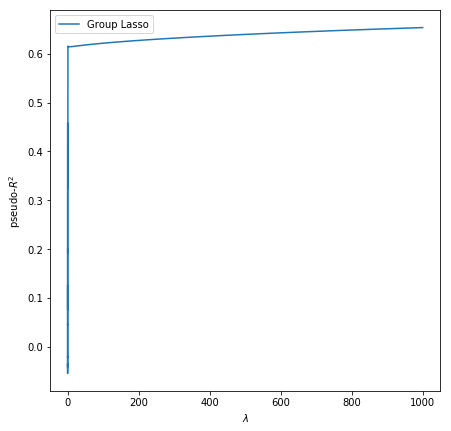

In [33]:
plt.figure(figsize=(7,7))
plt.plot(gl_glm.reg_lambda, gl_glm.score(X, y), label = 'Group Lasso')
plt.xlabel('$\lambda$')
plt.ylabel('pseudo-$R^2$')
#plt.ylim([-0.1, 0.7])
#plt.xlim([-0.1,.2])

#plt.tick_params(axis='y', right='off')
#plt.tick_params(axis='x', top='off')
#ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.legend()
plt.show()

In [34]:
beta = gl_glm.fit_

In [35]:
beta[99]['beta']

array([[  3.16573713e-03],
       [  6.84474760e-04],
       [ -5.98117606e-03],
       [  2.38076935e-05],
       [ -5.19844883e-02],
       [ -5.91359871e-04],
       [  1.53931444e-04],
       [  4.16638491e-04],
       [  1.92246954e-03],
       [ -3.41456046e-04],
       [ -4.44823224e-01],
       [ -9.10187670e-04],
       [ -6.82196322e-04],
       [ -3.81220702e-03],
       [ -8.68390184e-02],
       [ -8.87616296e-02],
       [  7.18557016e-04],
       [ -1.10852578e-01],
       [ -2.37286301e-01],
       [  1.21248085e-01],
       [ -8.86559153e-02],
       [ -1.10327694e-04],
       [  4.96685735e-04],
       [  2.54063444e-03],
       [  4.67851212e-03],
       [  1.04795524e-03],
       [  6.23726715e-04],
       [ -2.13396776e-03],
       [ -8.78561505e-03],
       [ -7.07856765e-04],
       [ -6.86327819e-04],
       [ -6.01222639e-04],
       [ -1.73133507e-03],
       [ -2.04024668e-04],
       [ -7.99038561e-03],
       [ -3.84193165e-04],
       [  1.35627420e-04],
 

In [36]:
coefs_gl = [0]*len(beta)

for i in range(len(beta)):
    coefs_gl[i] = beta[i]['beta']

In [37]:
coefs_gl = np.array(coefs_gl)
coefs_gl = coefs_gl.reshape(100,62)

In [40]:
def plot_lars(coefs, lines=False, title="Lars Path"):
    """
    Plot the lasso path where coefs is a matrix - the columns are beta vectors
    """
    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    if lines:
        plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title(title)
    plt.axis('tight')

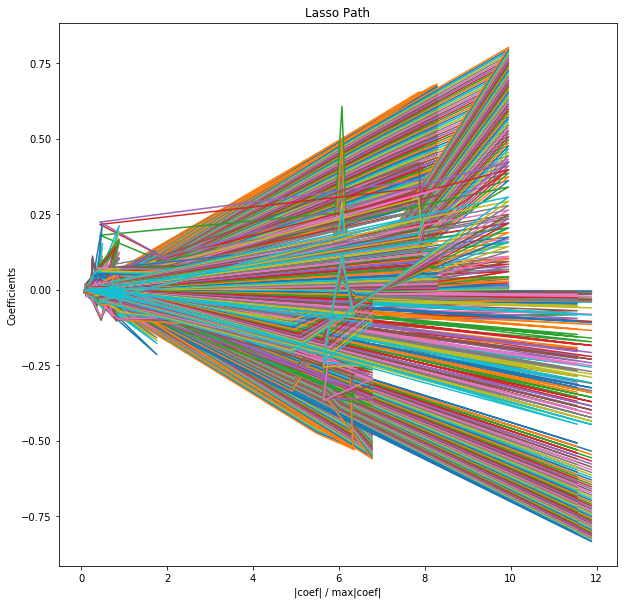

In [41]:
fig = plt.figure(figsize = (10,10))
plot_lars(coefs_gl,title = 'Lasso Path')

In [42]:
coef1 = beta[99]['beta']

In [43]:
len(coef1[abs(coef1) > 0.01])

19

In [44]:
coef1[abs(coef1) > 0.01]

array([-0.05198449, -0.44482322, -0.08683902, -0.08876163, -0.11085258,
       -0.2372863 ,  0.12124808, -0.08865592, -0.02746327,  0.16298992,
        0.16427123, -0.44581807,  0.1853199 ,  0.24876577, -0.03762849,
       -0.20768857,  0.30777182,  0.02683929, -0.07067853])

In [45]:
coef = pd.DataFrame(coef1,data.drop(['loan_status'],axis = 1).columns.values)
coef.columns = ['coef']
coef = coef.reset_index()

In [46]:
coef.head()

,index,coef
0,loan_amnt,0.003166
1,funded_amnt,0.000684
2,funded_amnt_inv,-0.005981
3,term,0.000024
4,int_rate,-0.051984


C:\Users\KH7020823\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\KH7020823\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


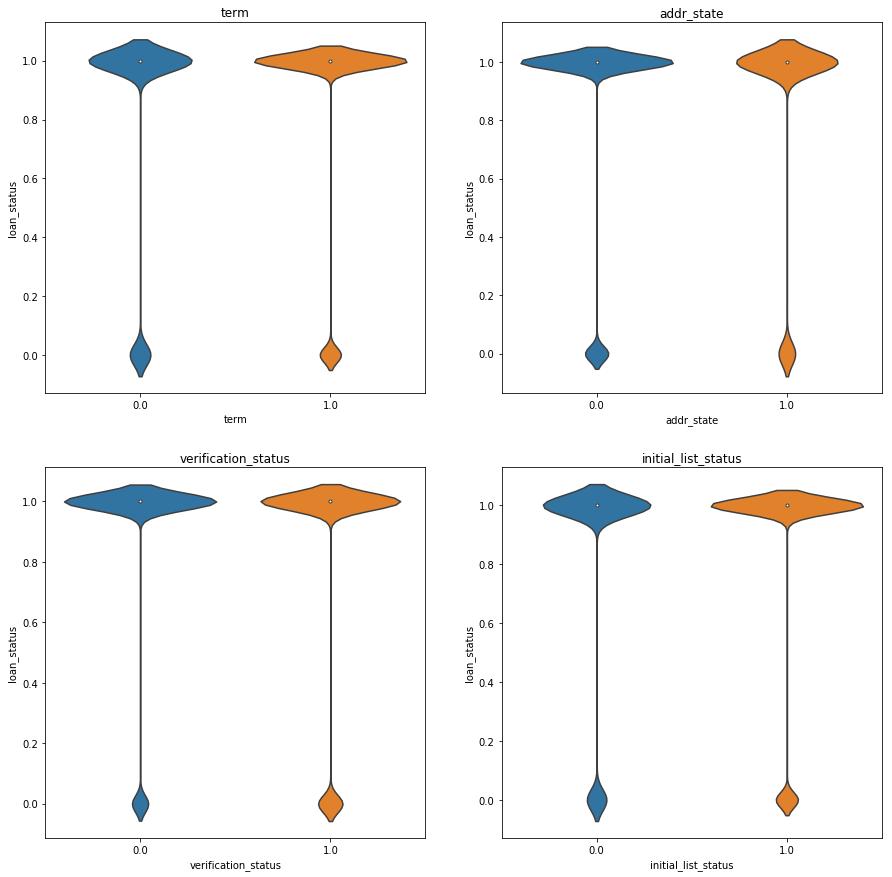

In [47]:
# Analysis of categorical variables
# violin plot to check the distribution of qualitative variables
# 'term', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status',
# 'application_type'
f, axes = plt.subplots(2, 2, figsize=(15,15))
buckets = ['term', 'addr_state', 'verification_status', 'initial_list_status']

for i in buckets:
    catg = data[["loan_status",i]]
    row = buckets.index(i) // 2
    col = buckets.index(i) % 2
    ax_curr = axes[row, col]
    sns.violinplot(x=i, y="loan_status", data=catg, ax=ax_curr)
    ax_curr.set_title(i)

plt.show()

### KNN Classification

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics as skmetrics
import itertools

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [70]:
X_tr = train[train.columns.difference(['loan_status'])].values
y_tr = train.loc[:, 'loan_status'].values
y_tr = y_tr.astype(int)

X_te = test[test.columns.difference(['loan_status'])].values
y_te = test.loc[:, 'loan_status'].values
y_te = y_te.astype(int)

In [72]:
neigh = KNeighborsClassifier(n_neighbors = 2)
neigh.fit(X_tr, y_tr) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [73]:
y_pred = neigh.predict(X_te)

Confusion matrix, without normalization
[[ 8591  5674]
 [10402 83935]]


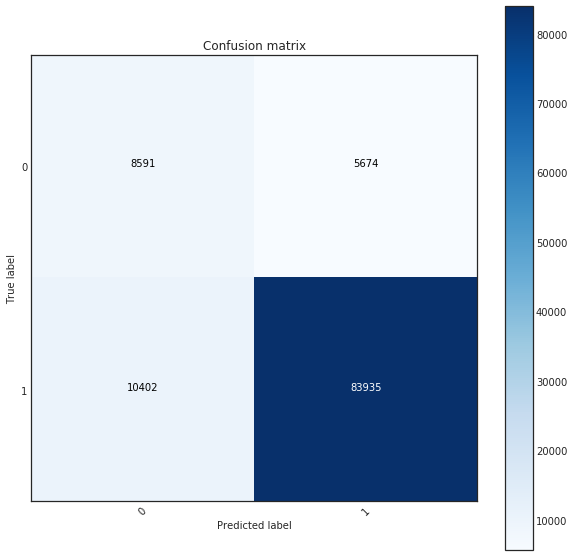

In [74]:
#Draw the confusion matrix
fig = plt.figure(figsize = (10,10))
with plt.style.context(('seaborn-white')):
    plot_confusion_matrix(confusion_matrix(y_te,y_pred),[0,1])
plt.show()

In [75]:
#Function that calculate the test error
def test_error(X_tr,y_tr,X_te,y_te,regmod):
    """
    Return the test error for square error loss
    
    Input: training and testing design matrix, X_tr ,X_te
            training and testing response vector, y_tr, y_te
            a regression model, regmod
            
    Output: scalar empirical risk
    """
    regmod.fit(X_tr,y_tr)
    y_hat = regmod.predict(X_te)
    return np.mean((y_hat - y_te)**2)

In [84]:
#Generate possible lambda's: integer points from 1 to 24
alphas = [i+1 for i in range(20)]

#Ridge regression
TestEr = []

for a in alphas:
    neigh.set_params(n_neighbors=a)
    TestEr.append(test_error(X_tr,y_tr,X_te,y_te,neigh))

KeyboardInterrupt: 

In [82]:
[i+1 for i in range(24)]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [ ]:
#Draw the Test Error for KNN classifier
fig = plt.figure(figsize = (7,7))
plt.plot(alphas,TestEr)

plt.xlabel('alphas')
plt.ylabel('Test Error')
plt.title('Test Error for KNN Classifier')
plt.show()